# Movie Rating Prediction
-Build a predictive model to estimate movie ratings based on different attributes.
- Perform data preprocessing, including encoding categorical variables and handling missing values
- Engineer useful features like director success rate and average rating of similar movies.
- Evaluate the model using appropriate techniques.
- Expected outcome: A model that accurately predicts movie ratings based on given inputs.


# Import required libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset

In [99]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Displaying the first 5 rows
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [101]:
# Checking summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [102]:
# Checking statistical details
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [103]:
# Checkinh for missing or Null values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [104]:
# Dropping null or missing values
df.dropna(subset=['Rating'], inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [105]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


** Converting votes to integers and remove commas and convert year(2019) to 2019 and remove min from duration columns **

In [106]:
# Removes 'min' and any extra spaces
df['Duration'] = df['Duration'].str.strip('min').str.strip()

# Conert to numeric, setting errors to NaN
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Filling missing values with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [107]:
# Checking for missing values if any present
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


**Now data has been cleaned and inputed**
# EDA ( Exploratory Data Analysis)

In [109]:
# Find the top 10 movies based on rating
top_movies = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
5077,Gho Gho Rani,(2019),105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
14222,The Reluctant Crime,(2020),113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
9105,Meher,(2020),135.0,Drama,9.3,27,Rajat Bhardwaj,Amrit,Dimple Chauhan,Sapna Das
13231,Sindhustan,(2019),64.0,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
1314,Ashok Vatika,(2018),97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,(2021),72.0,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur


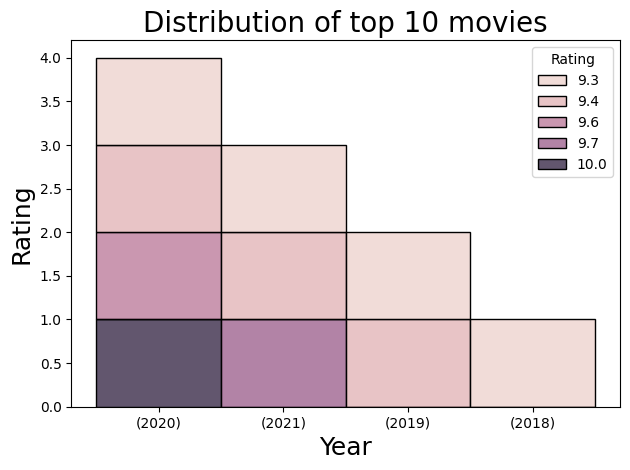

In [110]:
# Distribution of top 10 movies wrt year
sns.histplot(data=top_movies, x="Year", hue="Rating", multiple="stack")
plt.title('Distribution of top 10 movies', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.tight_layout()
plt.show()

In [111]:
# Distribution of Genre of movies
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genre
top_n = genre_counts.head(5)
top_n

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


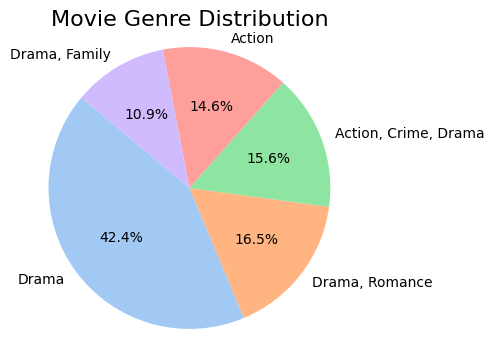

In [112]:
plt.figure(figsize=(4, 4))
plt.pie(top_n['Count'], labels=top_n['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [113]:
# Distribution of Top directors by average rating

# Group the data by director and calculate the average rating
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
2598,Suhrud Godbole,9.4
1513,Munni Pankaj,9.4
1601,Nikhil Mahar,9.3
1864,Raghav Jairath,9.3
2899,Vishwa Bhanu,9.3
763,Gautam Joshi,9.3


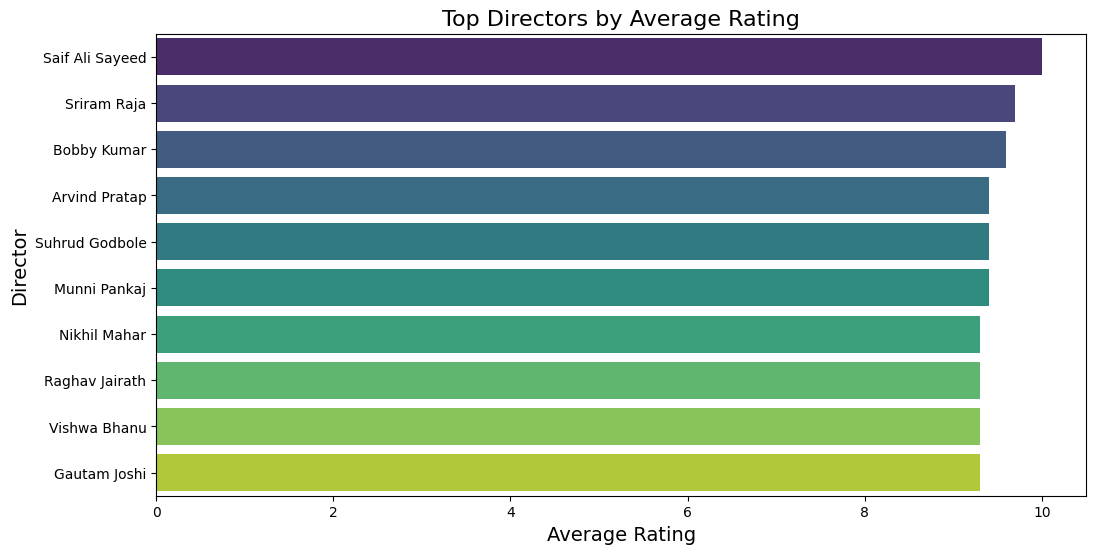

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

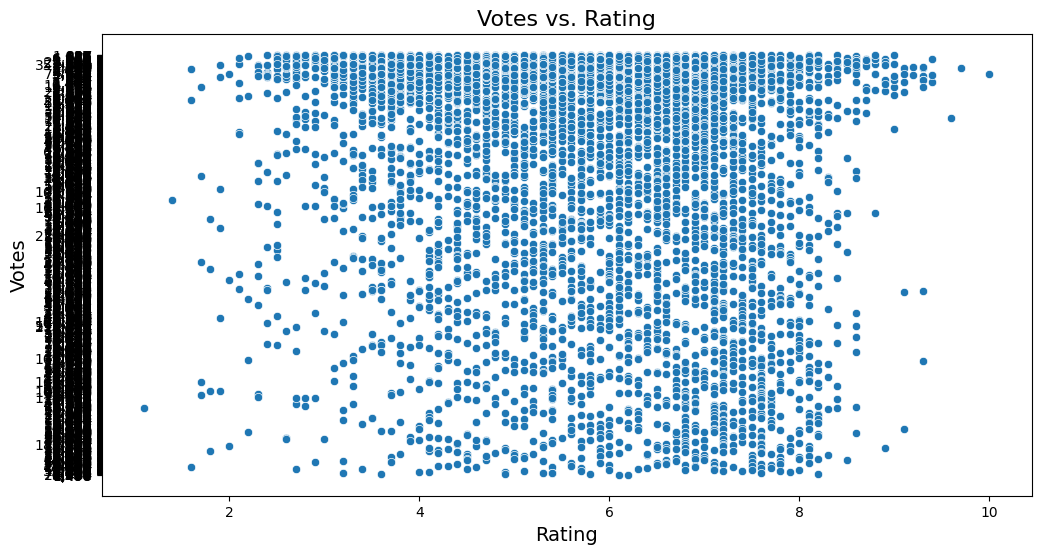

In [115]:
# Relationship between the number of votes and movie ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Votes',palette= "deep")

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

In [116]:
# Distribution of top actors by number of movie
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


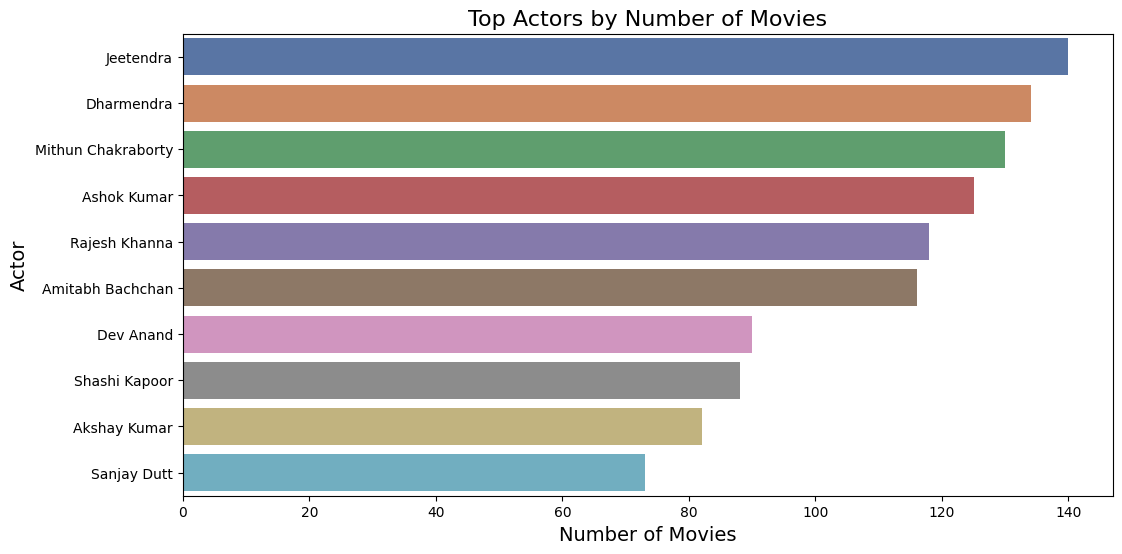

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h',palette= "deep")

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

In [118]:
# Distribution of number of movie released every year

yearly_movie_counts = df['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,(1917),1
88,(1931),3
89,(1932),2
86,(1933),4
90,(1934),2
...,...,...
1,(2017),223
2,(2018),214
0,(2019),238
9,(2020),157


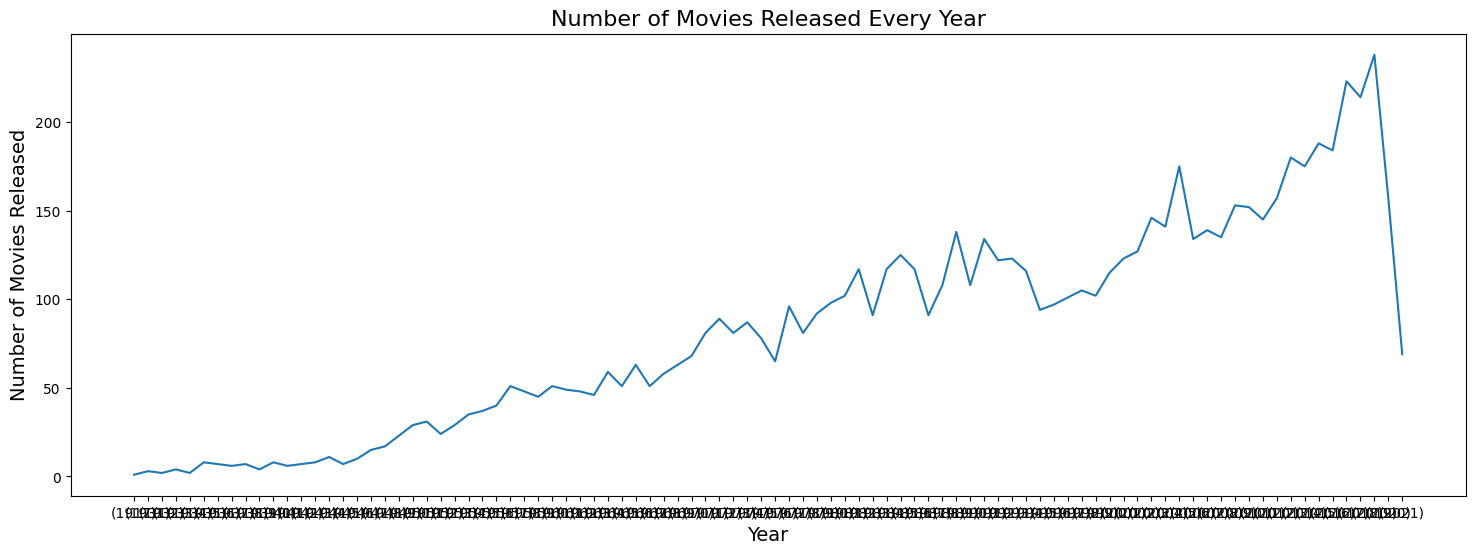

In [119]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

In [121]:
# Distribution of Durations of movies by years
df['Duration'] = df['Duration'].astype(int)
# Remove parentheses and convert to integers
df['Year'] = df['Year'].str.strip('()').astype(int)

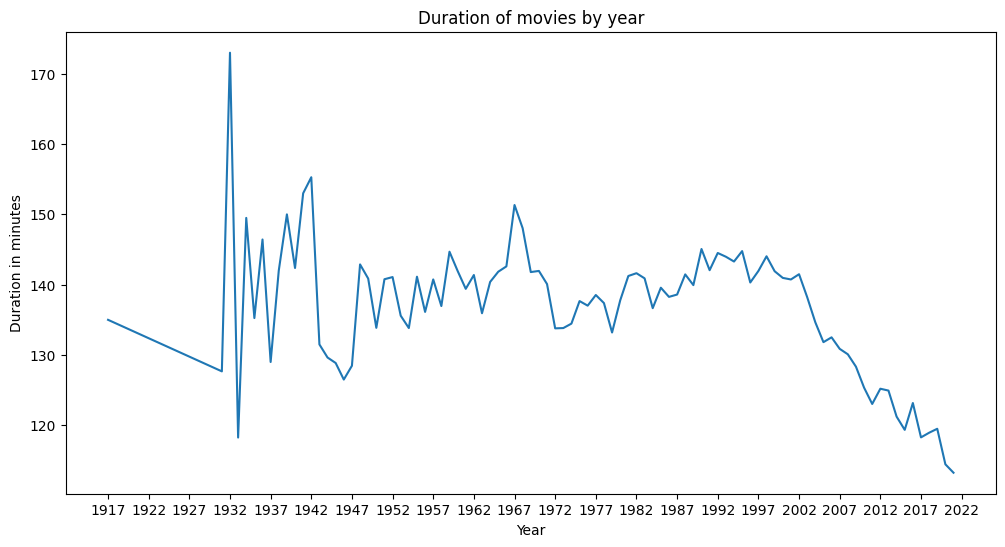

In [122]:
# Distribution of Durations of movies by years
df['Duration'] = df['Duration'].astype(int)
df['Year'] = df['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()


In [123]:
df['Genre'] = df['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = df.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


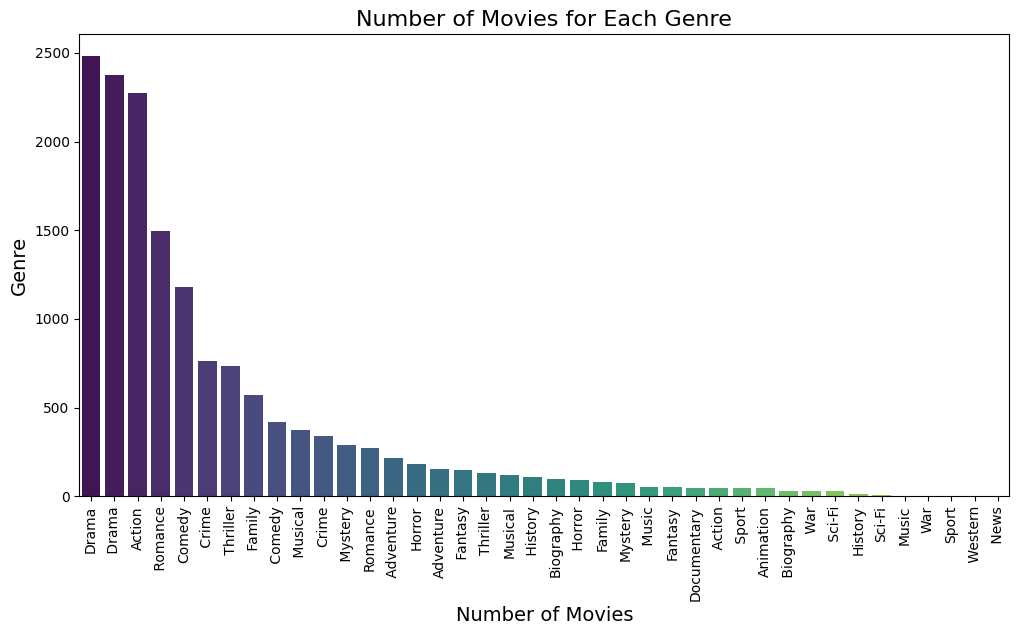

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

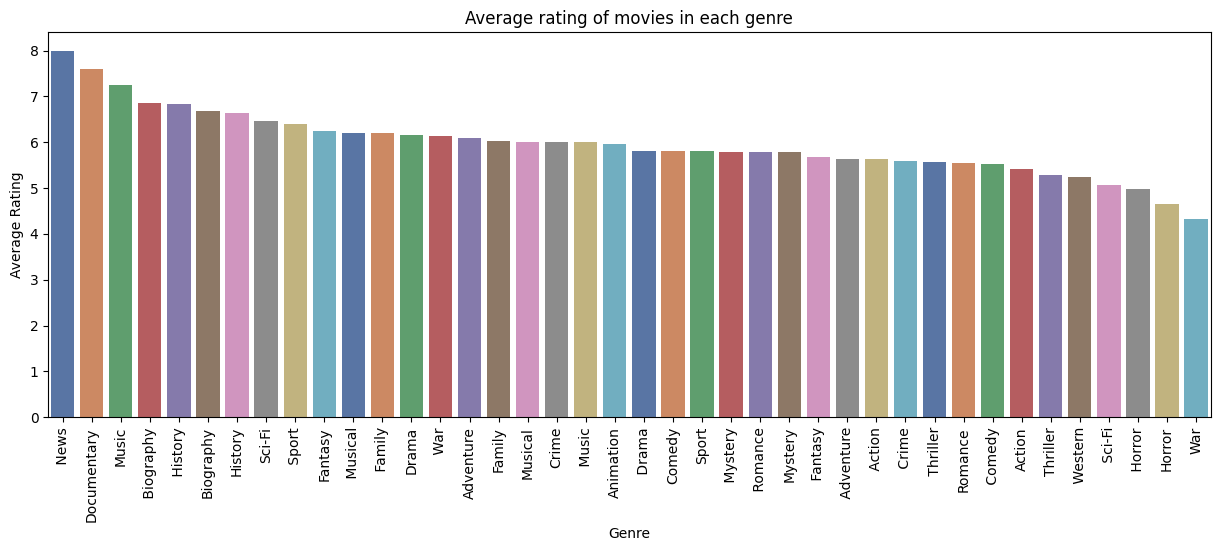

In [125]:
# Distribution of Average rating of movies in each genre
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)


plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='deep')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

# **Feature Engineering**

In [126]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,"1,086",2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [128]:
from sklearn.preprocessing import MinMaxScaler

trans_data['Votes'] = trans_data['Votes'].str.replace(',', '').astype(int)
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


# **Examine Correlation of Data**

In [129]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.134655
Genre,0.122565
Actor 2,0.038852
Actor 3,0.031550
Actor 1,0.025089
Duration,-0.001801
Director,-0.003678
Year,-0.194990


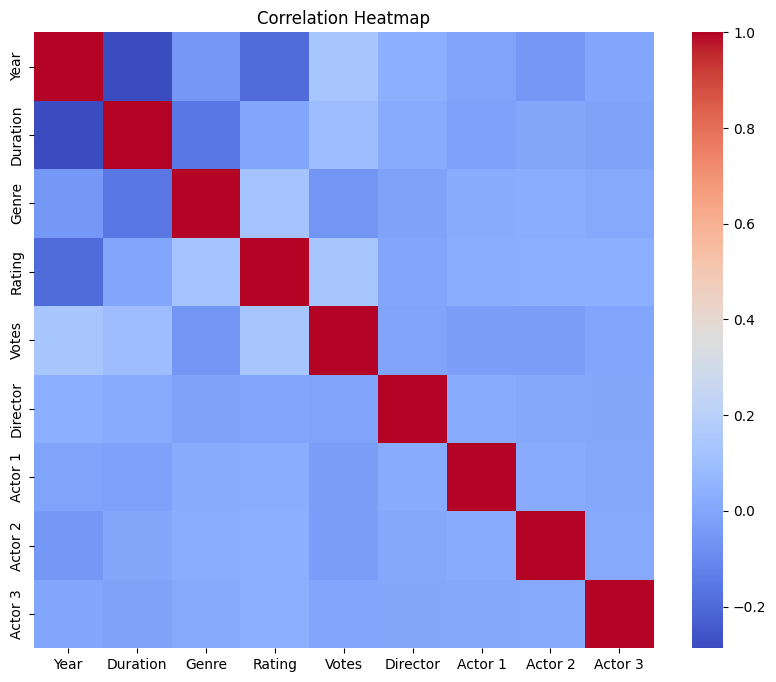

In [130]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,annot=False,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

Now our transfprmed columns are much correlated with the target variable so  we are ready to go
# Model Building

In [131]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)




# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)


# Train models
lr.fit(X_train, y_train)

LinearRegression()

In [132]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [133]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [134]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

print("\nDecision Tree Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))

Linear Regression Metrics:
Mean Squared Error: 1.7010031571987312
R-squared: 0.08194687389607569
Mean Absolute Error: 1.0274569412305543

Decision Tree Regression Metrics:
Mean Squared Error: 2.4061574074074072
R-squared: -0.29863387990784607
Mean Absolute Error: 1.1652777777777779


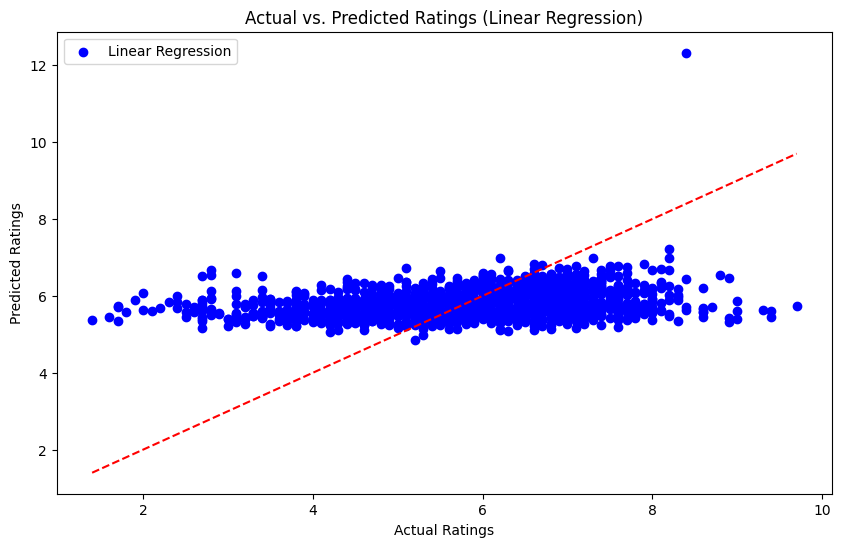

In [135]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

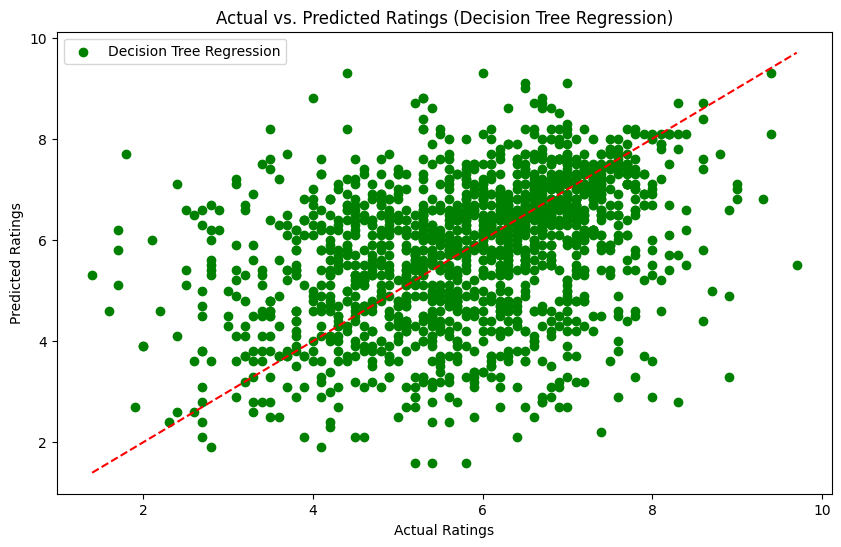

In [136]:
# Scatter plot for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings (Decision Tree Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

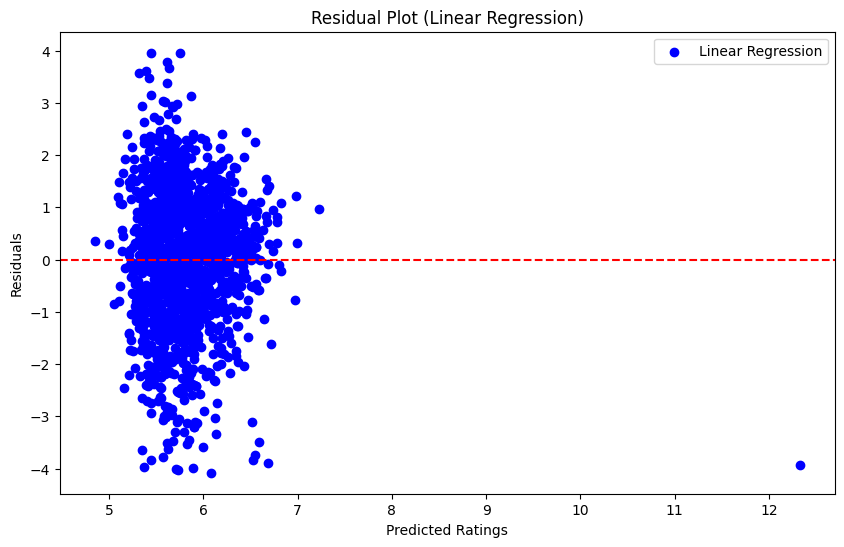

In [137]:
# Residual plots for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, y_test - y_pred_lr, color='blue', label='Linear Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.legend()
plt.show()

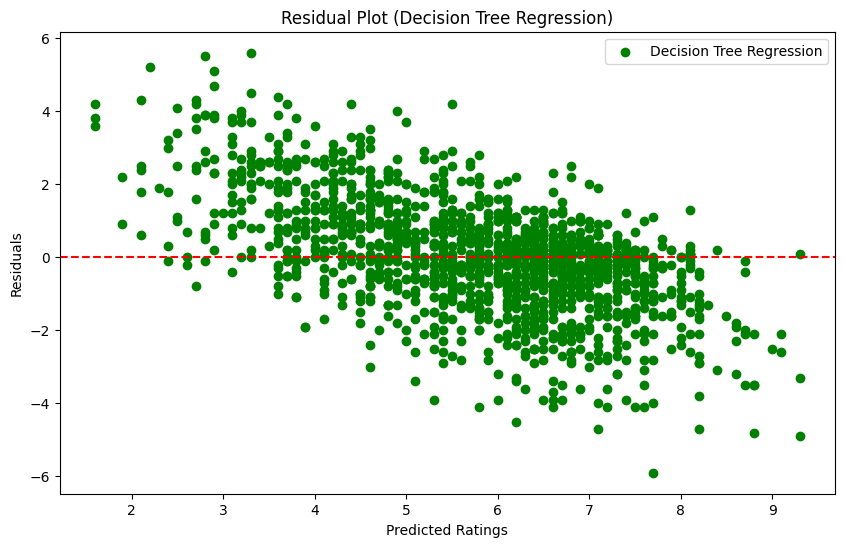

In [138]:
# Residual plots for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, y_test - y_pred_dt, color='green', label='Decision Tree Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Decision Tree Regression)')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# **Comparision of Model**

In [139]:
# Compute metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Compute metrics for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [140]:
# Print the metrics
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("Mean Absolute Error:", mae_lr)
print("\nDecision Tree Regression Metrics:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print("Mean Absolute Error:", mae_dt)

Linear Regression Metrics:
Mean Squared Error: 1.7010031571987312
R-squared: 0.08194687389607569
Mean Absolute Error: 1.0274569412305543

Decision Tree Regression Metrics:
Mean Squared Error: 2.4061574074074072
R-squared: -0.29863387990784607
Mean Absolute Error: 1.1652777777777779


# Visual Comparision

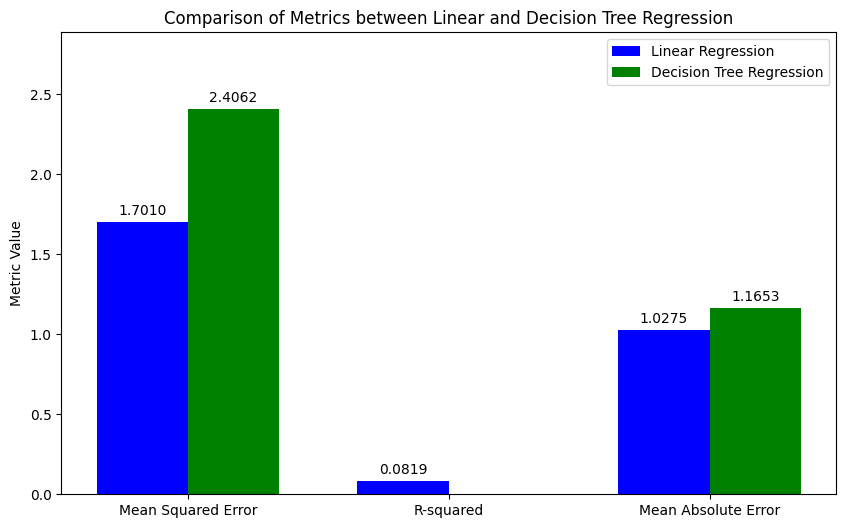

In [141]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for array operations

# Assuming you have already computed lr_metrics and dt_metrics
metrics = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
lr_metrics = [mse_lr, r2_lr, mae_lr]
dt_metrics = [mse_dt, r2_dt, mae_dt]

x = np.arange(len(metrics))  # Use numpy array for arithmetic operations
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Linear Regression', color='blue')
rects2 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree Regression', color='green')

ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics between Linear and Decision Tree Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, max(max(lr_metrics), max(dt_metrics)) * 1.2)  # Setting ylim for better visualization
plt.show()